In [1]:
import time
import warnings
import queue

import numpy as np
import pandas as pd

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

from scipy.stats import norm

from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from random import sample

from itertools import cycle, islice

In [2]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
n_components = 2 # the number of clusters
n_feature = 2 # the number of features

circle_X, circle_y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

moons_X, moons_y = datasets.make_moons(n_samples=n_samples, noise=0.05)

# generate isotropic Gaussian blobs (data from mixture Gaussian distributions)
blobs_X1, blobs_y1 = make_blobs(n_samples=n_samples, # the number of total samples
                  centers=n_components, # the number of clusters
                  n_features=n_feature, # the number of features
                  cluster_std = [1] * n_components, # the std of each cluster
                  random_state=2) # 2

blobs_X2, blobs_y2 = make_blobs(n_samples=n_samples, # the number of total samples
                  centers=n_components, # the number of clusters
                  n_features=n_feature, # the number of features
                  cluster_std = [2] * n_components, # the std of each cluster
                  random_state=2) # 2

random_X, random_y = np.random.rand(n_samples, 2), np.ones(n_samples)

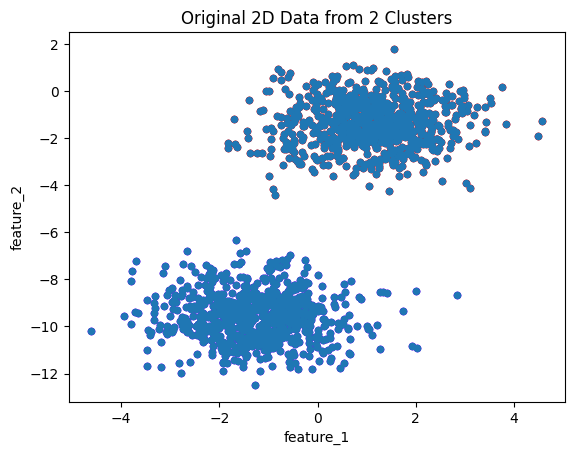

In [3]:
def visualize(X, y):

    # scatter plot, data points annotated by different colors
    df = pd.DataFrame(dict(feature_1=X[:,0], feature_2=X[:,1], label=y))
    
    cluster_name = set(y)
    colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))

    fig, ax = pyplot.subplots()
    
    grouped = df.groupby('label')
    
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', color=colors[key].reshape(1,-1))
        group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', color=colors[key].reshape(1,-1))
        group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2')
    
    pyplot.title('Original 2D Data from {} Clusters'.format(n_components))
    pyplot.show()

# Visualize the first dataset. 
visualize(blobs_X1, blobs_y1)

# Cluster Tendency 

In [4]:
# !pip install pyclustertend 
# https://pyclustertend.readthedocs.io/en/latest/_modules/pyclustertend/hopkins.html

In [5]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale


blobs_X1_H= hopkins(blobs_X1,500)
print(f"Hopkins Statistic: {blobs_X1_H:.4f}")

# The hopkins score of the dataset (between 0 and 1)
# Assess the clusterability of a dataset. 
# A score between 0 and 1, a score around 0.5 express no clusterability
# and a score tending to 0 express a high cluster tendency.


Hopkins Statistic: 0.1059


# Visual Assessment of Cluster Tendency (VAT)

Visual assessment of cluster tendency (VAT) approach (Bezdek and Hathaway, 2002)

1. Compute the dissimilarity (DM) matrix between the objects in the data set using the Euclidean distance measure
2. Reorder the DM so that similar objects are close to one another and create an Ordered Dissimilarity Matrix (ODM)
3. The ODM is displayed as an ordered dissimilarity image (ODI), which is the visual output of VAT



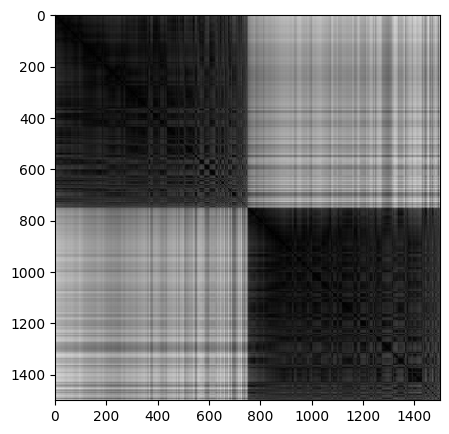

In [6]:
from pyclustertend import vat
# VAT (Visual Assessment for Tendency)
# https://pyclustertend.readthedocs.io/en/latest/_modules/pyclustertend/visual_assessment_of_tendency.html

vat(blobs_X1, figure_size=(5,5))

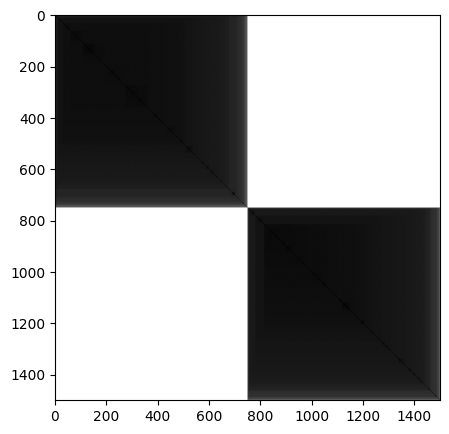

In [7]:
from pyclustertend import ivat
# VAT (Visual Assessment for Tendency)
# https://pyclustertend.readthedocs.io/en/latest/_modules/pyclustertend/visual_assessment_of_tendency.html

# iVAT (Improved Visual Assessment for Tendency)
# iVAT is a visual method of assessing the clustering tendency of a dataset. 
# It provides more precise and clearer densely black squares/rectangles in its printed map.

ivat(blobs_X1, figure_size=(5,5))

In [8]:
 # iVAT (Improved Visual Assessment for Tendency)

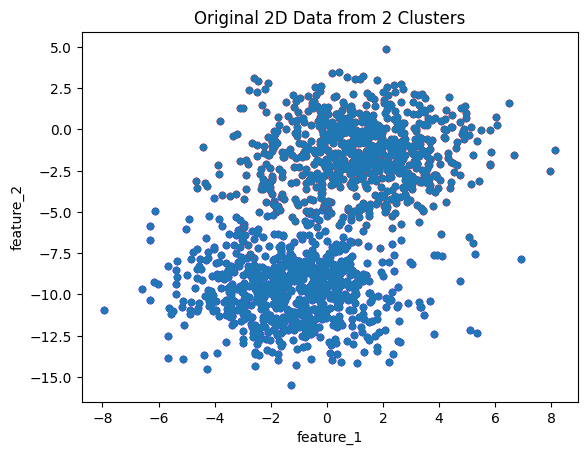

In [9]:
visualize(blobs_X2, blobs_y2)

In [10]:
blobs_X2_H= hopkins(blobs_X2,500)
print(f"Hopkins Statistic: {blobs_X2_H:.4f}")

Hopkins Statistic: 0.1620


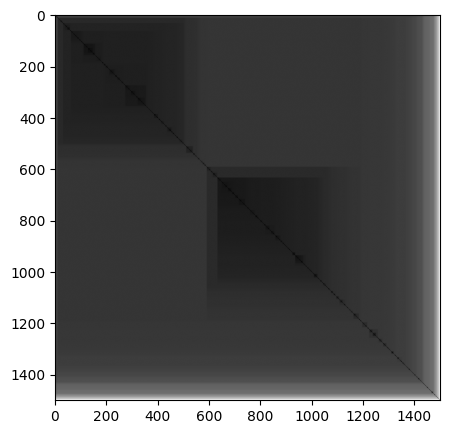

In [11]:
ivat(blobs_X2, figure_size=(5,5))

# Circles Data

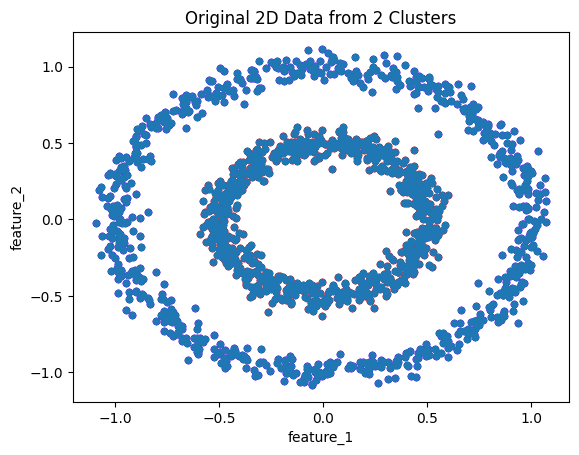

In [12]:
visualize(circle_X, circle_y)

In [13]:
H= hopkins(circle_X,500)
print(f"Hopkins Statistic: {H:.4f}")

Hopkins Statistic: 0.1766


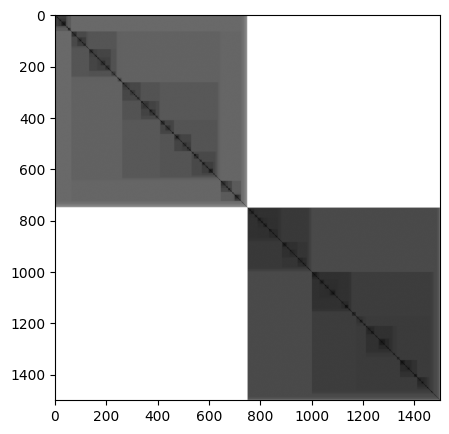

In [14]:
ivat(circle_X, figure_size=(5,5))

# Moons Datas

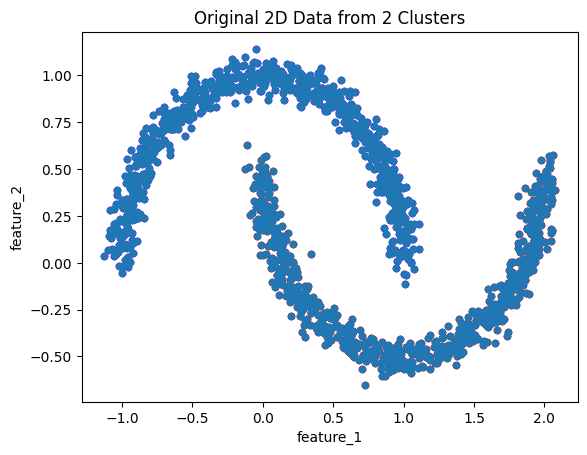

In [15]:
visualize(moons_X, moons_y)

In [16]:
H= hopkins(moons_X,500)
print(f"Hopkins Statistic: {H:.4f}")

Hopkins Statistic: 0.0830


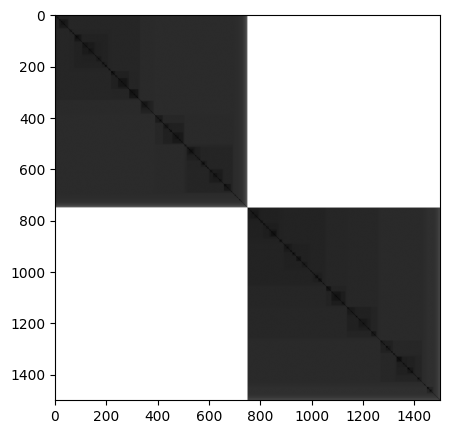

In [17]:
ivat(moons_X, figure_size=(5,5))

# Random Dataset

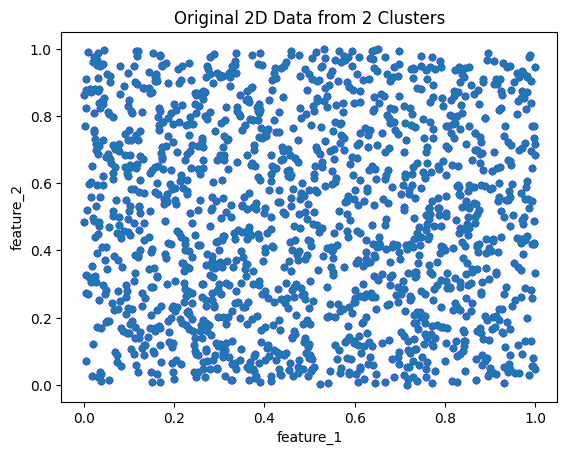

In [18]:
visualize(random_X, random_y)

In [19]:
H= hopkins(random_X,500)
print(f"Hopkins Statistic: {H:.4f}")

Hopkins Statistic: 0.5030


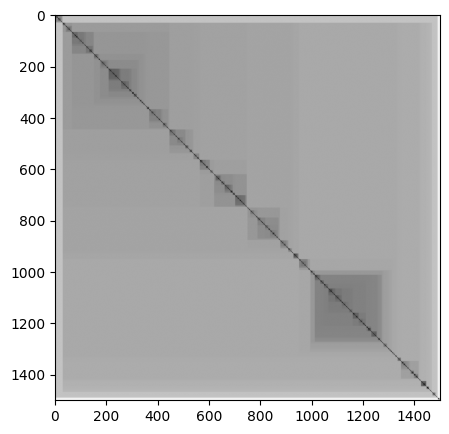

In [20]:
ivat(random_X, figure_size=(5,5))